# 📚 Time Series Analysis — Moving to Advanced Statistical Models

In our journey so far, we have learned about basic **Time Series Concepts**, **Stationarity**, **Smoothing Methods** like Moving Averages and Exponential Smoothing. These models are very powerful for capturing **basic trends and seasonality**.  

However, **real-world time series** often have **complex patterns** that require **more robust, mathematical models** which can:
- Model past values and predict future values
- Handle trend, seasonality, and noise
- Provide statistically meaningful insights

Thus, we now move to the world of **Statistical Time Series Models** such as:

| Model | Purpose |
|:------|:--------|
| AR (AutoRegressive) | Predict future using past values |
| MA (Moving Average) | Predict future using past forecast errors |
| ARMA | Combine AR and MA (only for stationary series) |
| ARIMA | Combine AR, Differencing (I), and MA (for non-stationary series) |
| SARIMA | Seasonal version of ARIMA |
| SARIMAX | SARIMA + External Regressors |
| VAR | For multiple (interrelated) time series |
| ARCH/GARCH | For modeling volatility and heteroskedasticity |

---

## 🧠 Why Statistical Models?

- They **explicitly model** the internal structure of the series (lags, seasonality, errors).
- They **require less data** compared to Machine Learning models.
- They offer **interpretability** (understanding the series' behavior).
- They **perform extremely well** when assumptions are met.

---

## 🧮 Mathematical Logic (Simplified)

- **AR (p):** Value depends on its **own previous p values**  
  $$
  y_t = \phi_1 y_{t-1} + \phi_2 y_{t-2} + ... + \phi_p y_{t-p} + \epsilon_t
   $$

- **MA (q):** Value depends on **past q errors**  
   $$
  y_t = \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + ... + \theta_q \epsilon_{t-q}
   $$

- **ARMA (p,q):** AR + MA together (only for stationary data)

- **ARIMA (p,d,q):** ARMA + **differencing d times** to handle non-stationarity

---

# 🏁 Now, let's move to practical hands-on: ARIMA on Milk Production Data!


### Step 1 : Import Libraries



In [18]:
# basic EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# statistical tests
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# ARIMA model
from statsmodels.tsa.arima.model import ARIMA


# Warnings
import warnings
warnings.filterwarnings('ignore')

## Step 2 : Data Loading

- Download from **Kaggle** using Kaggle API

In [19]:
# 1. Upload the Kaggle API token
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shaghiljamal","key":"1c240c0740f3c3bd3dbd647f15fd7430"}'}

In [20]:
# 2. Make a directory called .kaggle(hidden)
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [21]:
# 3. Copy kaggle.json to my created folder(.kaggle)
!cp kaggle.json ~/.kaggle/

In [22]:
# 4. Change the permission of file it become usebale
!chmod 600 ~/.kaggle/kaggle.json


In [23]:
# 5. Download the data from kaggle
!kaggle datasets download nathsri1983/monthy-milk

Dataset URL: https://www.kaggle.com/datasets/nathsri1983/monthy-milk
License(s): CC0-1.0


In [24]:
# unzip the file
! unzip monthy-milk.zip


Archive:  monthy-milk.zip
  inflating: monthly-milk-production.csv  


In [25]:
# df
df = pd.read_csv('/content/monthly-milk-production.csv')

In [26]:
df.head()

,Month,Milk Production
0,1962-01-01 01:00:00,589.0
1,1962-02-01 01:00:00,561.0
2,1962-03-01 01:00:00,640.0
3,1962-04-01 01:00:00,656.0
4,1962-05-01 01:00:00,727.0


## Step 3 : Data Prepartion

In [27]:
# Convert Month to index
df.index = pd.to_datetime(df['Month'])


In [29]:
df.drop(columns='Month',inplace=True)

In [30]:
df.head()

,Milk Production
Month,
1962-01-01 01:00:00,589.0
1962-02-01 01:00:00,561.0
1962-03-01 01:00:00,640.0
1962-04-01 01:00:00,656.0
1962-05-01 01:00:00,727.0


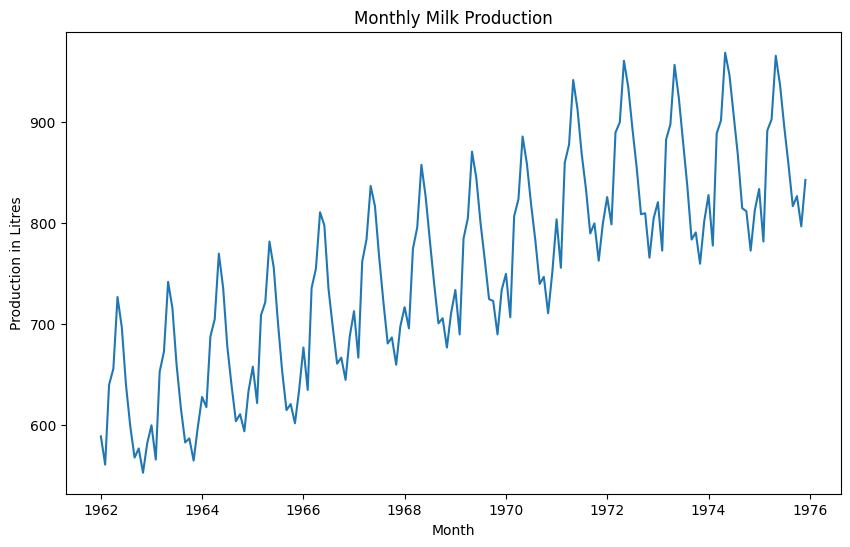

In [31]:
# Plotting of time series
plt.figure(figsize=(10,6))
plt.plot(df)
plt.title('Monthly Milk Production')
plt.xlabel('Month')
plt.ylabel('Production in Litres')
plt.show()

In [33]:
# Stationarity Tests

# Augmented Dickey Fuller Test
result = adfuller(df['Milk Production'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

if result[1] <= 0.05:
    print('Conclusions : The series is stationary.')
else:
    print('Conclusions : There is no enough evidence to reject null hypothesis. The series is non-stationary.')

ADF Statistic: -1.303812
p-value: 0.627427
Conclusions : There is no enough evidence to reject null hypothesis. The series is non-stationary.


In [34]:
# Solution - Differencing
df['Milk Production Diff'] = df['Milk Production'].diff()
df.head(20)

,Milk Production,Milk Production Diff
Month,,
1962-01-01 01:00:00,589.0,NaN
1962-02-01 01:00:00,561.0,-28.0
1962-03-01 01:00:00,640.0,79.0
1962-04-01 01:00:00,656.0,16.0
1962-05-01 01:00:00,727.0,71.0
1962-06-01 01:00:00,697.0,-30.0
1962-07-01 01:00:00,640.0,-57.0
1962-08-01 01:00:00,599.0,-41.0
1962-09-01 01:00:00,568.0,-31.0


In [35]:
# ADF test after differencing
result = adfuller(df['Milk Production Diff'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

if result[1] <= 0.05:
    print('Conclusions : The series is stationary.')
else:
    print('Conclusions : There is no enough evidence to reject null hypothesis. The series is non-stationary.')

ADF Statistic: -3.054996
p-value: 0.030068
Conclusions : The series is stationary.


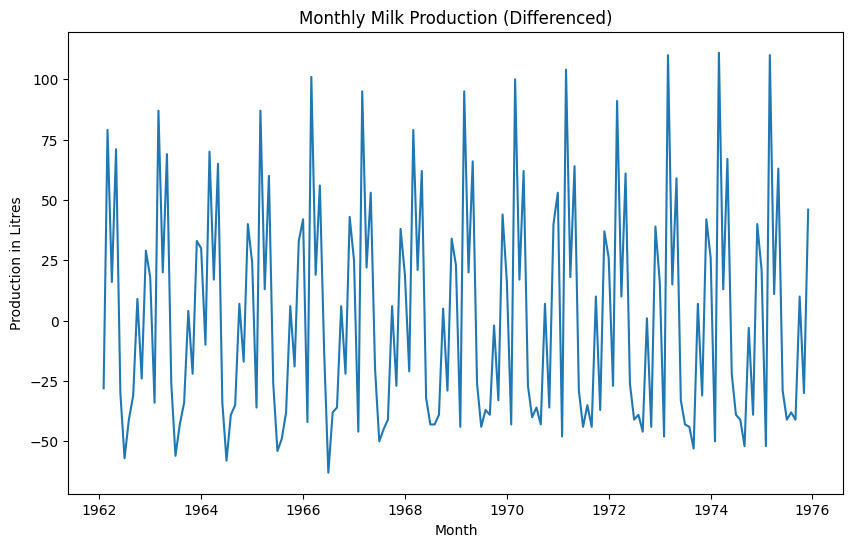

In [36]:
# Plot differenced data
plt.figure(figsize=(10,6))
plt.plot(df['Milk Production Diff'])
plt.title('Monthly Milk Production (Differenced)')
plt.xlabel('Month')
plt.ylabel('Production in Litres')
plt.show()

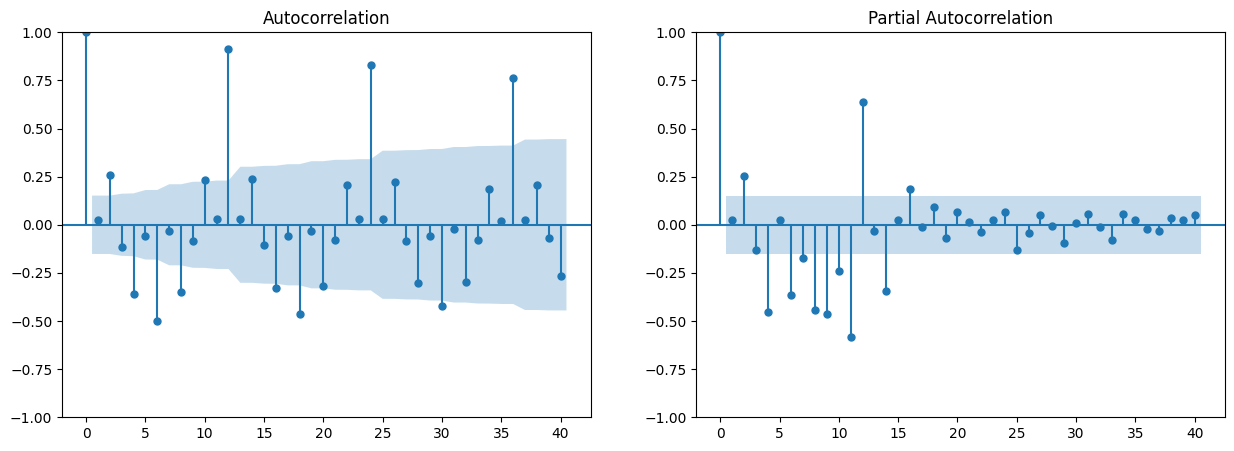

In [37]:
# Step 6: ACF(p) and PACF(q) for Auto correlation

fig, axes = plt.subplots(1,2,figsize=(15,5))

plot_acf(df['Milk Production Diff'].dropna(),lags=40,ax=axes[0])
plot_pacf(df['Milk Production Diff'].dropna(),lags=40,ax=axes[1])

plt.show()

**Observations from ACF and PACF Plots:**

**Autocorrelation Function (ACF):**

* Significant positive spikes at lags 1, 12, and 24, extending beyond the significance bounds.
* A generally gradual decay pattern, suggesting potential non-stationarity or an autoregressive component.
* Strong indications of seasonality with a period of 12 due to significant correlations at lags that are multiples of 12.

**Partial Autocorrelation Function (PACF):**

* Significant positive spikes at lags 1 and 2.
* A potential significant spike around lag 12.
* A relatively rapid cut-off after the initial significant lags, characteristic of an Autoregressive (AR) process.

**Overall Interpretation:**

* **Non-Stationarity/Trend:** The slow decay in the ACF hints at potential non-stationarity or a trend in the data.
* **Autoregressive (AR) Component:** The significant initial spikes in the PACF (lags 1 and 2) suggest an AR(2) component.
* **Seasonality:** The prominent spikes at lags 12 and 24 in the ACF, along with a possible spike at lag 12 in the PACF, strongly indicate a seasonal pattern with a period of 12.

**Potential Model Candidates:**

* **SARIMA (Seasonal Autoregressive Integrated Moving Average) models:** Likely the most appropriate due to the indications of both AR components and seasonality. The order of the AR part (p) might be around 2, and seasonal AR terms (P) would likely be involved with a seasonal period (s) of 12. Differencing (d and D) might be needed to achieve stationarity.
* **Seasonal Autoregressive (SAR) models:** Could be considered if stationarity is achieved through differencing.

**Further Analysis Recommended:**

* Conduct formal stationarity tests (e.g., ADF test).
* Apply differencing (if needed) and re-examine ACF and PACF.
* Estimate and diagnose potential SARIMA models.

In [93]:
# Step 7 : Fit ARIMA Model
# Order (p=1,d=1,q=1) - No seasonality


model = ARIMA(df['Milk Production Diff'],order=(1,1,1))
model_fit = model.fit()




In [94]:
# Summary
print(model_fit.summary())

                                SARIMAX Results                                 
Dep. Variable:     Milk Production Diff   No. Observations:                  168
Model:                   ARIMA(1, 1, 1)   Log Likelihood                -891.140
Date:                  Sun, 27 Apr 2025   AIC                           1788.279
Time:                          14:10:31   BIC                           1797.633
Sample:                      01-01-1962   HQIC                          1792.076
                           - 12-01-1975                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5244      0.157     -3.333      0.001      -0.833      -0.216
ma.L1         -0.1656      0.192     -0.862      0.389      -0.542       0.211
sigma2      2443.8507    359.267    

1976-01-01 01:00:00    -2.825720
1976-02-01 01:00:00    22.780909
1976-03-01 01:00:00     9.351523
1976-04-01 01:00:00    16.394559
1976-05-01 01:00:00    12.700842
1976-06-01 01:00:00    14.638010
1976-07-01 01:00:00    13.622063
1976-08-01 01:00:00    14.154876
1976-09-01 01:00:00    13.875442
1976-10-01 01:00:00    14.021991
1976-11-01 01:00:00    13.945134
1976-12-01 01:00:00    13.985442
1977-01-01 01:00:00    13.964302
1977-02-01 01:00:00    13.975389
1977-03-01 01:00:00    13.969575
1977-04-01 01:00:00    13.972624
1977-05-01 01:00:00    13.971025
1977-06-01 01:00:00    13.971863
1977-07-01 01:00:00    13.971423
1977-08-01 01:00:00    13.971654
1977-09-01 01:00:00    13.971533
1977-10-01 01:00:00    13.971597
1977-11-01 01:00:00    13.971563
1977-12-01 01:00:00    13.971581
Freq: MS, Name: predicted_mean, dtype: float64


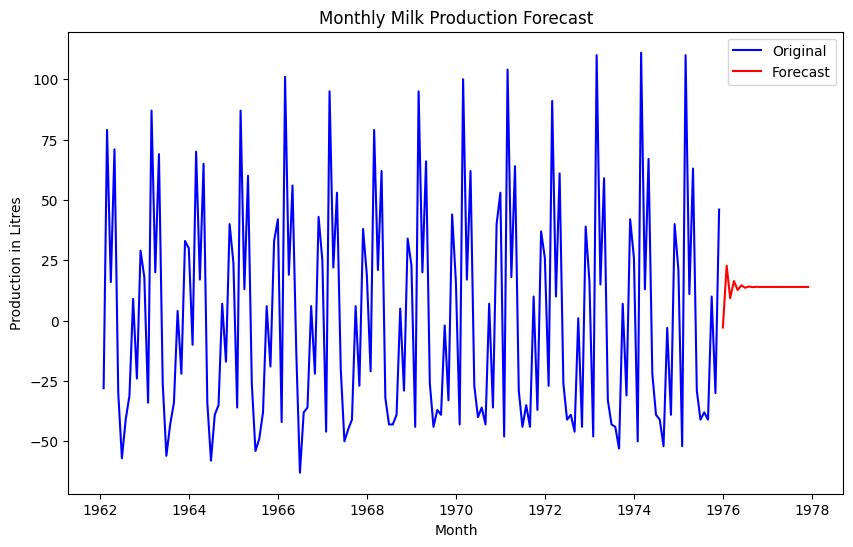

In [95]:
# Forecast
forecast = model_fit.forecast(steps=24)
print(forecast)

# Plot
plt.figure(figsize=(10,6))
plt.plot(df['Milk Production Diff'],label='Original',color='blue')
plt.plot(forecast,label='Forecast',color='red')
plt.title('Monthly Milk Production Forecast')
plt.xlabel('Month')
plt.ylabel('Production in Litres')
plt.legend()
plt.show()

### SARIMA - seasonality added

In [96]:
# order (p,d,q, s) = (AR,I,MA,Seasonality)
# SARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_sarima = SARIMAX(df['Milk Production Diff'],order=(1,1,1),seasonal_order=(1,1,1,12))
model_sarima_fit = model_sarima.fit()
# summary
print(model_sarima_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:               Milk Production Diff   No. Observations:                  168
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -538.060
Date:                            Sun, 27 Apr 2025   AIC                           1086.120
Time:                                    14:10:49   BIC                           1101.337
Sample:                                01-01-1962   HQIC                          1092.301
                                     - 12-01-1975                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2222      0.082     -2.708      0.007      -0.383      -0.061
ma.L1         -0.9999      5.969   

1976-01-01 01:00:00     22.279203
1976-02-01 01:00:00    -47.268820
1976-03-01 01:00:00    107.079216
1976-04-01 01:00:00     12.941931
1976-05-01 01:00:00     63.231373
1976-06-01 01:00:00    -27.303946
1976-07-01 01:00:00    -41.185830
1976-08-01 01:00:00    -39.777945
1976-09-01 01:00:00    -46.502217
1976-10-01 01:00:00      4.734913
1976-11-01 01:00:00    -34.408461
1976-12-01 01:00:00     42.171498
1977-01-01 01:00:00     22.930908
1977-02-01 01:00:00    -47.774600
1977-03-01 01:00:00    107.294228
1977-04-01 01:00:00     12.783848
1977-05-01 01:00:00     63.198616
1977-06-01 01:00:00    -27.437576
1977-07-01 01:00:00    -41.192252
1977-08-01 01:00:00    -39.677283
1977-09-01 01:00:00    -46.150778
1977-10-01 01:00:00      5.070380
1977-11-01 01:00:00    -34.130668
1977-12-01 01:00:00     42.410242
Freq: MS, Name: predicted_mean, dtype: float64


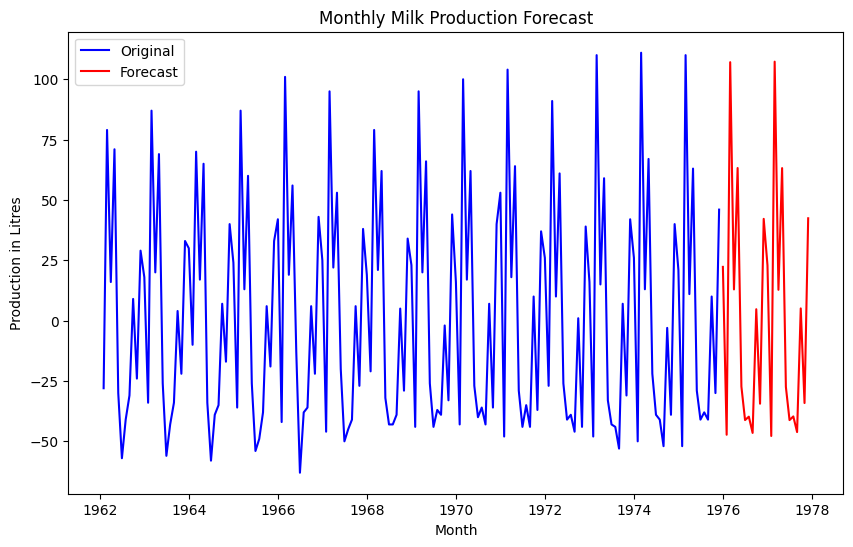

In [97]:
# forecast
forecast_sarima = model_sarima_fit.forecast(steps=24)
print(forecast_sarima)

# plot
plt.figure(figsize=(10,6))
plt.plot(df['Milk Production Diff'],label='Original',color='blue')
plt.plot(forecast_sarima,label='Forecast',color='red')
plt.title('Monthly Milk Production Forecast')
plt.xlabel('Month')
plt.ylabel('Production in Litres')
plt.legend()
plt.show()

In [100]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("manjeetsingh/retaildataset")

print("Path to dataset files:", path)




Path to dataset files: /kaggle/input/retaildataset


In [102]:
df2 = pd.read_csv('/kaggle/input/retaildataset/sales data-set.csv')
df2.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [104]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


## SARIMAX


In [103]:
y = df2['Weekly_Sales']

exog = df2[['IsHoliday']].astype(int)

print(y)
print(exog)

0         24924.50
1         46039.49
2         41595.55
3         19403.54
4         21827.90
            ...   
421565      508.37
421566      628.10
421567     1061.02
421568      760.01
421569     1076.80
Name: Weekly_Sales, Length: 421570, dtype: float64
        IsHoliday
0               0
1               1
2               0
3               0
4               0
...           ...
421565          0
421566          0
421567          0
421568          0
421569          0

[421570 rows x 1 columns]


In [107]:
# make date as index
df2['Date'] = pd.to_datetime(df2['Date'],format='mixed')
df2.set_index('Date',inplace=True)



In [108]:
df2.head()

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-05-02,1,1,24924.50,False
2010-12-02,1,1,46039.49,True
2010-02-19,1,1,41595.55,False
2010-02-26,1,1,19403.54,False
2010-05-03,1,1,21827.90,False


In [110]:
df2.drop(columns=['Store','Dept'],inplace=True)

In [111]:
df2.head()

,Weekly_Sales,IsHoliday
Date,,
2010-05-02,24924.50,False
2010-12-02,46039.49,True
2010-02-19,41595.55,False
2010-02-26,19403.54,False
2010-05-03,21827.90,False


In [112]:
# fit the model
model = SARIMAX(y,exog=exog,order=(1,1,1),seasonal_order=(1,1,1,12))
model_fit = model.fit()

# model summary
print(model_fit.summary())

KeyboardInterrupt: 

In [ ]:
# forecast
forecast = model_fit.forecast(steps=16,exog=exog[-16:])
print(forecast)

#confidence intervals
conf_int = model_fit.get_forecast(steps=16).conf_int()
print(conf_int)

#plot
plt.figure(figsize=(10,6))
plt.plot(y,label='Original',color='blue')
plt.plot(forecast,label='Forecast',color='red')
plt.fill_between(conf_int.index,conf_int['lower Weekly_Sales'],conf_int['upper Weekly_Sales'],color='green',alpha=0.3)
plt.title('Weekly Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()